In [4]:
# All the includes

from transformers import pipeline
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('../dataframes/praw_hot_comments.csv')
comment = ''
submissions_comments = []
counter = 0
total_positives_comments = 0
total_negatives_comments = 0
total_positives_submissions = 0
total_negatives_submissions = 0
total_neutral_submissions = 0

to_be_remove = '###[Meta] Sticky Comment\\n\\n[Rule 2](' \
               'https://www.reddit.com/r/conspiracy/wiki/faq#wiki_2_-_address_the_argument.3B_not_the_user' \
               '.2C_the_mods.2C_or_the_sub.) ***does not apply*** when replying to this stickied comment.  \\n\\n[' \
               'Rule 2](https://www.reddit.com/r/conspiracy/wiki/faq#wiki_2_-_address_the_argument.3B_not_the_user' \
               '.2C_the_mods.2C_or_the_sub.) ***does apply*** throughout the rest of this thread.\\n\\n*What this ' \
               'means*: Please keep any "meta" discussion directed at specific users, mods, or /r/conspiracy in ' \
               'general in this comment chain ***only.***\\n\\n*I am a bot, and this action was performed ' \
               'automatically. Please [contact the moderators of this subreddit](' \
               '/message/compose/?to=/r/conspiracy) if you have any questions or concerns.*'

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline("sentiment-analysis", model=model_name)

for value in df.values:
    comment = value[1]
    comment = str(value[1]).replace(to_be_remove, '').replace(" '", '').replace('\\n', '')
    submissions_comments = comment.split("',")

    neutral = 0
    positive_comment = 0
    negative_comment = 0
    for sentences in submissions_comments:
        sentence = sentences.split('.')
        positive_line = 0
        negative_line = 0
        for line in sentence:
            result = classifier(line)
            if result[0]['label'] == 'POSITIVE':
                positive_line = positive_line + 1
            elif result[0]['label'] == 'NEGATIVE':
                negative_line = negative_line + 1
            else:
                neutral = neutral + 1
        if positive_line > negative_line:
            positive_comment = positive_comment + 1
        else:
            negative_comment = negative_comment + 1
    if positive_comment > negative_comment:
        total_positives_submissions = total_positives_submissions + 1
    elif negative_comment > positive_comment:
        total_negatives_submissions = total_negatives_submissions + 1
    else:
        total_neutral_submissions = total_neutral_submissions + 1

    total_positives_comments = total_positives_comments + positive_comment
    total_negatives_comments = total_negatives_comments + negative_comment

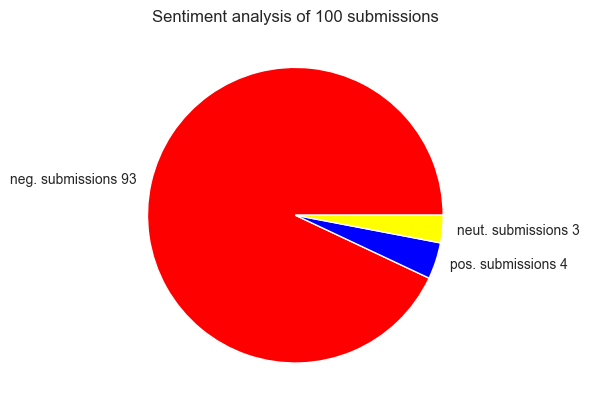

In [6]:
x = np.array([total_negatives_submissions, total_positives_submissions, total_neutral_submissions])
total_submissions_label = ["neg. submissions " + str(total_negatives_submissions), "pos. submissions " + \
                           str(total_positives_submissions), "neut. submissions " + str(total_neutral_submissions)]
total_submissions_color = ["red", "blue", "yellow"]
plt.pie(x, labels=total_submissions_label, colors=total_submissions_color)
plt.title("Sentiment analysis of 100 submissions")
plt.show()

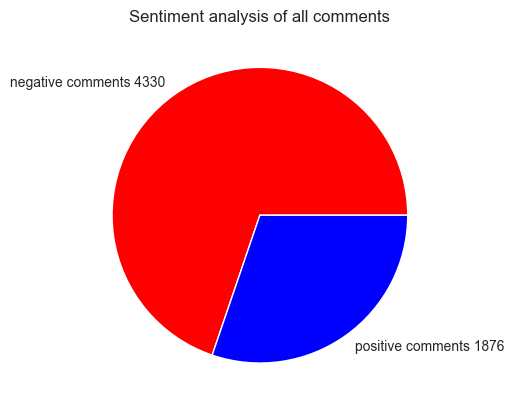

In [7]:
y = np.array([total_negatives_comments, total_positives_comments])
total_comments_label = ["negative comments " + str(total_negatives_comments),
                        "positive comments " + str(total_positives_comments)]
total_comments_color = ["red", "blue"]
plt.pie(y, labels=total_comments_label, colors=total_comments_color)
plt.title("Sentiment analysis of all comments")
plt.show()